# 測試報酬率分布約在何種水位時，能將riskiness r的數值控制在合理的水位
* 平均報酬要為正
* 報酬值不能所有皆為正
* 如果試算平均期望值來看，在r小的時候期望值超過1(原本報酬是負的)的資產，通常是較差的資產。然後圖形會隨著r值上升而變小，最後趨近於1
* 若是隨著r值增加而增加的，通常都是較好的資產，可以一開始都全部再向負的地方平移。

In [1]:
import sympy
import math
from scipy.optimize import fsolve
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# test data
#arr_returns = [0.01, 0.02, -0.01, 0.02, 0.04, 0.03, 0.015, 0.01, 0.02, 0.03]
arr_returns = 1000*np.array([0.07, -0.01,0.02,0.03]+[0.05]*10)
arr_returns

array([ 70., -10.,  20.,  30.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,
        50.,  50.,  50.])

### 方法一：用sympy的solve

### 方法二：用scipy的fsolve

In [13]:

arr_ret = np.array(arr_returns)
def f1(x):
    #return math.exp(-1*arr_returns[0]/x) + math.exp(-1*arr_returns[1]/x) + math.exp(-1*arr_returns[2]/x) - 3
    return sum( np.exp(-1*arr_ret/x) ) - len(arr_ret)
guess = 10**(-2)
while (guess<1000):
    risk2 = fsolve(f1,guess)
    if risk2 != guess:
        break
    guess = guess*10
print(risk2)

[3.78979501]


D:\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


### 驗算

# 畫圖測試

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[22012.46579480878, 134.41320480854768, 14.032943506105614, -1.8101777162855743, -6.589694679177607, -8.66068573948033, -9.748119407240273, -10.38459129537086, -10.779148062395192, -11.028304467980067]


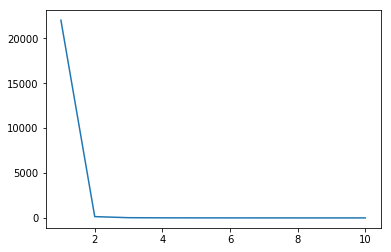

In [4]:

x = np.linspace(1,10,10)
y = [f1(a) for a in x]
print(x)
print(y)
plt.plot(x,y)